# Basis Change

In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In this notebook I will explain the concept of a basis and show how a single vector can be described with respect to two different bases. 


A basis of a vector space $V$ is defined as a set of vectors $B = ( \underline{b_{1}}, \underline{b_{2}}, \underline{b_{3}}$ ) (with $V \in {\rm I\!R}^{3}$) with which a linear combination of $B$ may describe any vector existing within $V$

The most used basis is the standard, $B_{s.b} = ( \underline{b_{1}}, \underline{b_{2}}, \underline{b_{3}})$ ) with

$$ \underline{b_{1}} = \begin{pmatrix} 1\\
0 \\ 0  \end{pmatrix} , \space  \space \space \space \space \space
\underline{b_{2}} = \begin{pmatrix} 0\\
1 \\ 0 \end{pmatrix} , \space  \space \space \space \space \space
\underline{b_{3}} = \begin{pmatrix} 0\\
0 \\ 1  \end{pmatrix} $$

Trivially any vector existing within $V$ is easily described by a linear combination of these vectors.

However, we are not constrained to desribing vectors with a single basis. We may wish to describe vectors in 
$V$ using a new basis $\tilde{B} = ( \underline{\tilde{b_{1}}}, \underline{\tilde{b_{2}}}, \underline{\tilde{b_{3}}})$ 

where

$$ \underline{\tilde{b_{1}}} = \begin{pmatrix} 1\\
0 \\ -1  \end{pmatrix} , \space  \space \space \space \space \space
\underline{\tilde{b_{2}}} = \begin{pmatrix} 0\\
-1 \\ 1 \end{pmatrix} , \space  \space \space \space \space \space
\underline{\tilde{b_{3}}} = \begin{pmatrix} -1\\
0 \\ 0  \end{pmatrix} $$


We can plot these basis according to the view of the standard basis

In [3]:
b_1, b_2, b_3 = np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])

In [4]:
b_1t, b_2t, b_3t = np.array([1, 0, -1]), np.array([0, -1, 1]), np.array([-1, 0, 0])

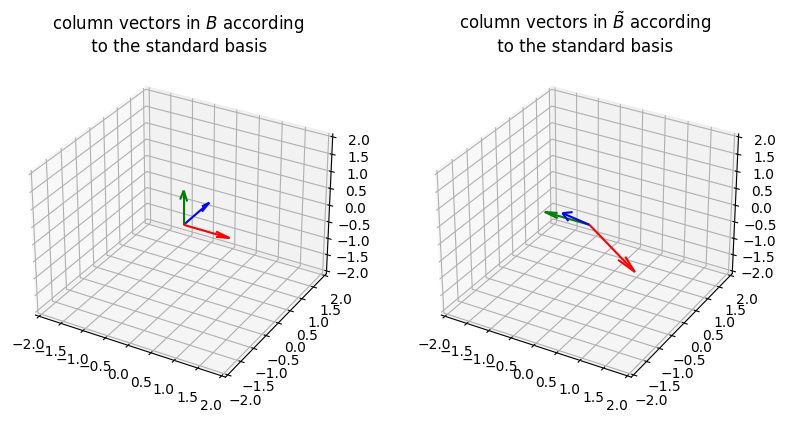

In [5]:
fig = plt.figure(figsize=plt.figaspect(0.5))
lims = 2

ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.quiver(0, 0, 0, *b_1, color="r")
ax.quiver(0, 0, 0, *b_2, color="b")
ax.quiver(0, 0, 0, *b_3, color="g")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.set_title("column vectors in $B$ according \n to the standard basis ")

ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.quiver(0, 0, 0, *b_1t, color="r")
ax.quiver(0, 0, 0, *b_2t, color="b")
ax.quiver(0, 0, 0, *b_3t, color="g")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.set_title(r"column vectors in $\tilde{B}$ according" + "\n to the standard basis ")


plt.show()

It is important to be clear that this view of the basis vectors wholly depends from which basis you are considering it from. Let's take a look at the view of the basis vectors according to the ~ basis

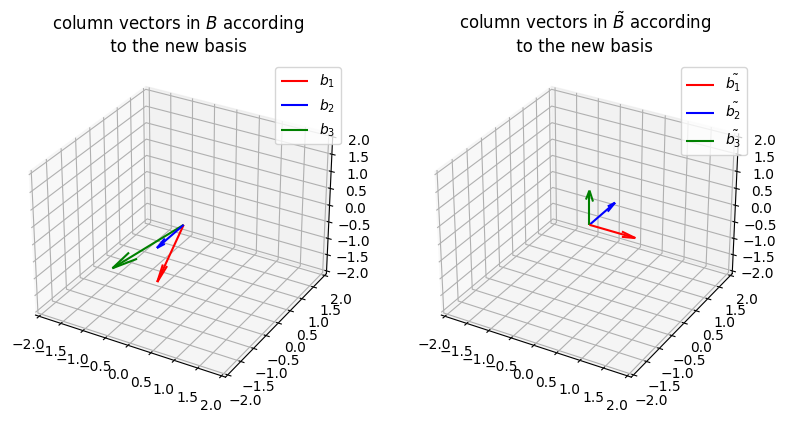

In [10]:
# S and S_inv will be explained later
S = np.array([b_1t, b_2t, b_3t])
S_inv = np.linalg.inv(S)


fig = plt.figure(figsize=plt.figaspect(0.5))
lims = 2

ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.quiver(0, 0, 0, *(S_inv @ b_1), color="r", label=r"$b_{1}$")
ax.quiver(0, 0, 0, *(S_inv @ b_2), color="b", label=r"$b_{2}$")
ax.quiver(0, 0, 0, *(S_inv @ b_3), color="g", label=r"$b_{3}$")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.set_title("column vectors in $B$ according \n to the new basis ")
ax.legend()

ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.quiver(0, 0, 0, *[1, 0, 0], color="r", label=r"$\tilde{b_{1}}$")
ax.quiver(0, 0, 0, *[0, 1, 0], color="b", label=r"$\tilde{b_{2}}$")
ax.quiver(0, 0, 0, *[0, 0, 1], color="g", label=r"$\tilde{b_{3}}$")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.set_title(r"column vectors in $\tilde{B}$ according" + "\n to the new basis ")
ax.legend()


plt.show()

Importantly, a useful feature of these diagrams is that when we visualise the basis vectors in their own space, they always appear as three perpindicular vectors. This is because they are viewing the vectors from within their own reference frame.

This result may look quite consfusing. To help understand how we get to it we need to understand how to translate between bases.

Let's take vector $x$ where
$$x = \begin{pmatrix} -3\\
2 \\ -2 \end{pmatrix}$$

More specifically this vector is described as 
$$ x = -3 \hat{x_{1}}  + 2 \hat{x_{2}} - 2 \hat{x_{3}}$$

where we have delibrately left the vectors $\{\hat{x_{1}}, \hat{x_{2}}, \hat{x_{3}} \}$ unspecified. The actual direction of vector $x$ depends entirely upon the basis vectors used to describe $\{\hat{x_{1}}, \hat{x_{2}}, \hat{x_{3}} \}$

In order to transfer between $B$ and $\tilde{B}$ we must describe the vectors $( \underline{\tilde{b_{1}}}, \underline{\tilde{b_{2}}}, \underline{\tilde{b_{3}}})$ in terms of $ ( \underline{b_{1}}, \underline{b_{2}}, \underline{b_{3}})$. Given we are using the standard basis as one of our basis the transformation matrix, $S$ is just the basis vectors of $\tilde{B}$ as the columns of the matrix i.e.

$$S = \begin{pmatrix} 1 & 0 & -1 \\ 
0 & -1 & 0 \\
-1 & 1 & 0\end{pmatrix}  $$ 

To be explicit: $S$ transforms a vector, $x$ from being expressed in terms of $\tilde{B}$, $x_{\tilde{B}}$ to being expressed in terms of $B$, $x_{B}$

$$ S x_{\tilde{B}}=  x_{B}$$

Let's go ahead and plot this vector $x$

In [7]:
x = np.array([-3, 2, -2])

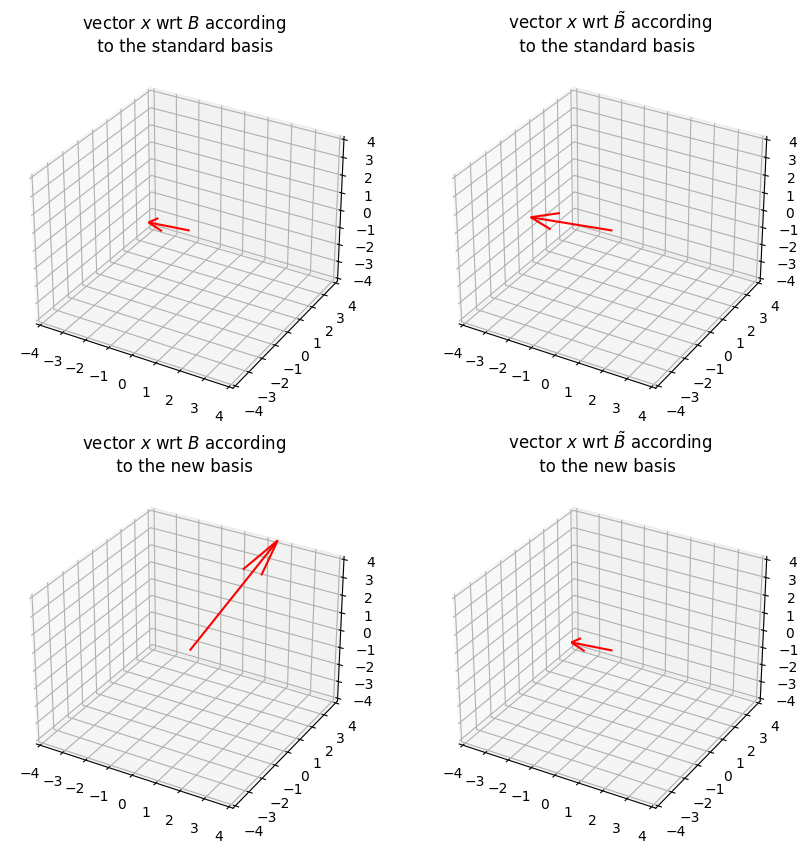

In [20]:
fig = plt.figure(figsize=(10, 10))
lims = 4

ax = fig.add_subplot(2, 2, 1, projection="3d")
ax.quiver(0, 0, 0, *x, color="r")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.set_title("vector $x$ wrt $B$ according \n to the standard basis ")

ax = fig.add_subplot(2, 2, 2, projection="3d")
ax.quiver(0, 0, 0, *(S @ x), color="r")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.set_title(r" vector $x$ wrt $\tilde{B}$ according" + "\n to the standard basis ")

ax = fig.add_subplot(2, 2, 3, projection="3d")
ax.quiver(0, 0, 0, *(S_inv @ x), color="r")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.set_title("vector $x$ wrt $B$ according \n to the new basis ")

ax = fig.add_subplot(2, 2, 4, projection="3d")
ax.quiver(0, 0, 0, *x, color="r")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.set_title(r" vector $x$ wrt $\tilde{B}$ according" + "\n to the new basis ")


plt.show()

Again notice how this vector is the same when it is expressed with the basis vectors which belong to the reference frame which we are seeing it in.

## Summary